# Detailed data analysis
- Business and Data understanding
- Data cleaning
- Detailed EDA
- Data preparation
- Feature engineering
- Hypothesis testing

In [2]:
# Load required libraries
import numpy as np
import pandas as pd

# Custom utils from kesh-utils (Check source code: https://github.com/KeshavShetty/kesh-utils)
from KUtils.common import utils
from KUtils.eda import chartil
from KUtils.eda import data_preparation as dp

# Scoring related libraries
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, make_scorer, recall_score, precision_score

In [3]:
# Set decimal places precision to 3 digit (Gloabl effect)
pd.options.display.float_format = '{:,.3f}'.format

In [4]:
# This dataset is headless csv. Import column names based on Data Dictionary 
adult_income_df = pd.read_csv('adult.data', header=None, 
                             names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
                                    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
                                    'hours-per-week', 'native-country', 'target'])

# Have a quick review of data/features/columns etc using
- .shape
- .head()
- .info()
- .desribe()


In [5]:
adult_income_df.shape

(32561, 15)

There are 32,561 rows and 15 columns/features includes dependent column or target column

In [6]:
adult_income_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
adult_income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
target            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Numerical columns: 'age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week'

Categorical columns: 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'target'

In [8]:
adult_income_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,"32,561.000","32,561.000","32,561.000","32,561.000","32,561.000","32,561.000"
mean,38.582,"189,778.367",10.081,"1,077.649",87.304,40.437
std,13.640,"105,549.978",2.573,"7,385.292",402.960,12.347
min,17.000,"12,285.000",1.000,0.000,0.000,1.000
25%,28.000,"117,827.000",9.000,0.000,0.000,40.000
50%,37.000,"178,356.000",10.000,0.000,0.000,40.000
75%,48.000,"237,051.000",12.000,0.000,0.000,45.000
max,90.000,"1,484,705.000",16.000,"99,999.000","4,356.000",99.000


capital-gain and capital-loss contains lot of values around 0, Need some treatment

# Have a quick look at the Unique values, NaN, Nulls, Missing values, empty values etc

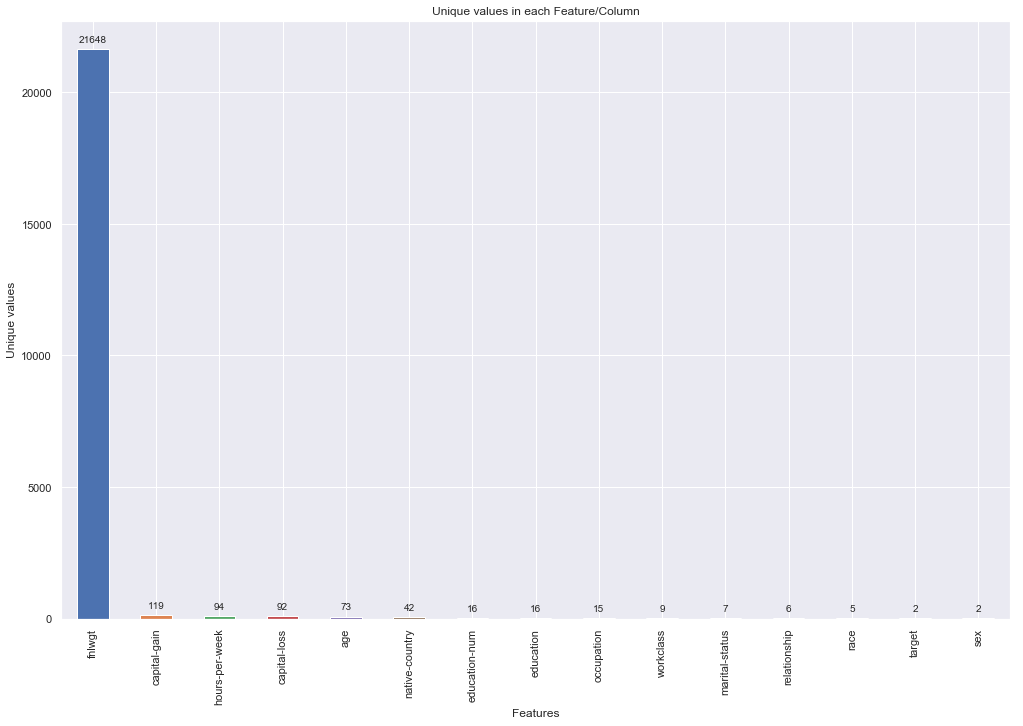

In [9]:
# Plot unique value count in each feature/column
dp.plotUnique(adult_income_df,  optional_settings={'sort_by_value':True})

'native-country' being a categorical variable has lot of unique levels. Rest of the categorical variable seems to be in good accetable range 

In [10]:
# Plot null or nans in each column 
dp.plotNullInColumns(adult_income_df)

Nothing to plot. All series value are 0


In [11]:
dp.plotNullInRows(adult_income_df)

Nothing to plot. All series value are 0


Nothing found as NaN, Need to check further on empty or blank datas

# Start analysing individual column starting from target column

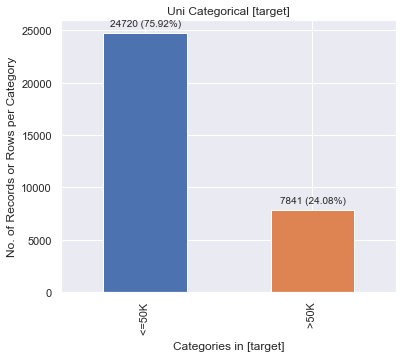

In [12]:
chartil.plot(adult_income_df, ['target'])

Target column is acceptable balance in the ratio of ~ 76%(Class <=50K) and 24%( Class >50K)

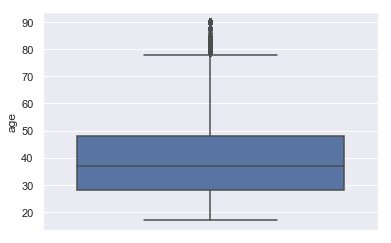

In [13]:
chartil.plot(adult_income_df, ['age'])

C:\Users\keshav\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


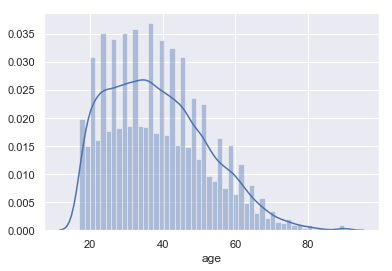

In [14]:
chartil.plot(adult_income_df,['age'], chart_type='distplot')

Age requires outlier treatment. Item action for later stage of data preparation

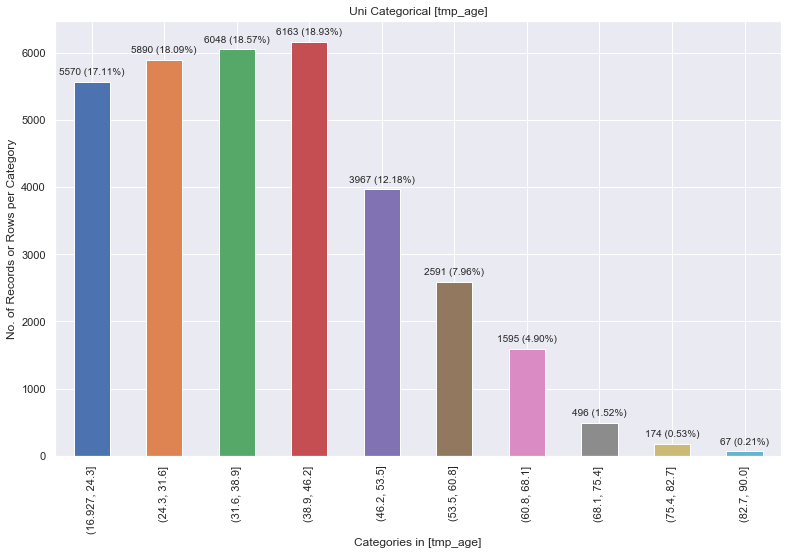

In [15]:
chartil.plot(adult_income_df, ['age'], chart_type='barchart')

target           <=50K   >50K
tmp_age                      
(16.927, 24.3]   0.989  0.011
(24.3, 31.6]     0.863  0.137
(31.6, 38.9]     0.723  0.277
(38.9, 46.2]     0.638  0.362
(46.2, 53.5]     0.598  0.402
(53.5, 60.8]     0.643  0.357
(60.8, 68.1]     0.739  0.261
(68.1, 75.4]     0.810  0.190
(75.4, 82.7]     0.833  0.167
(82.7, 90.0]     0.836  0.164


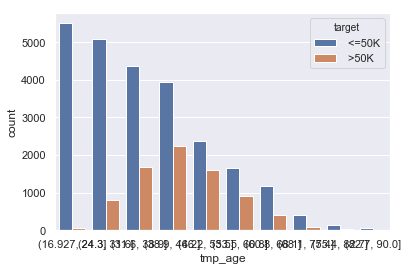

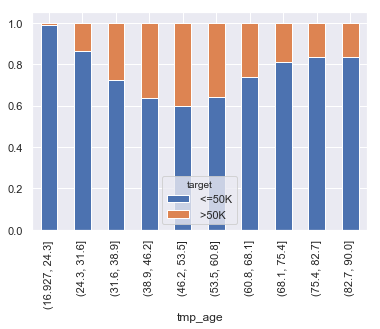

In [16]:
# With target column
chartil.plot(adult_income_df, ['age', 'target'], chart_type='barchart')
chartil.plot(adult_income_df, ['age', 'target'], chart_type='crosstab')

Most of the high salary earner are of age 31+ to 60

count   32,561.000
mean        40.437
std         12.347
min          1.000
1%           8.000
25%         40.000
50%         40.000
75%         45.000
90%         55.000
95%         60.000
99%         80.000
max         99.000
Name: hours-per-week, dtype: float64

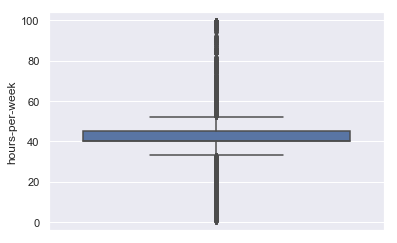

In [17]:
chartil.plot(adult_income_df, ['hours-per-week'])
adult_income_df['hours-per-week'].describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

C:\Users\keshav\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


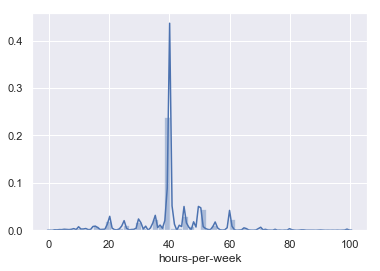

In [18]:
chartil.plot(adult_income_df, ['hours-per-week'], chart_type='distplot')

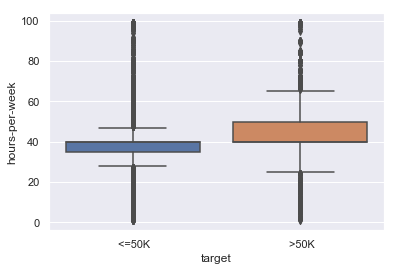

In [19]:
chartil.plot(adult_income_df, ['hours-per-week', 'target'])

Todo:
    Do we need outlier treatment or just scaling will do? 
    Since outlier has different outlier distribution among target classes.

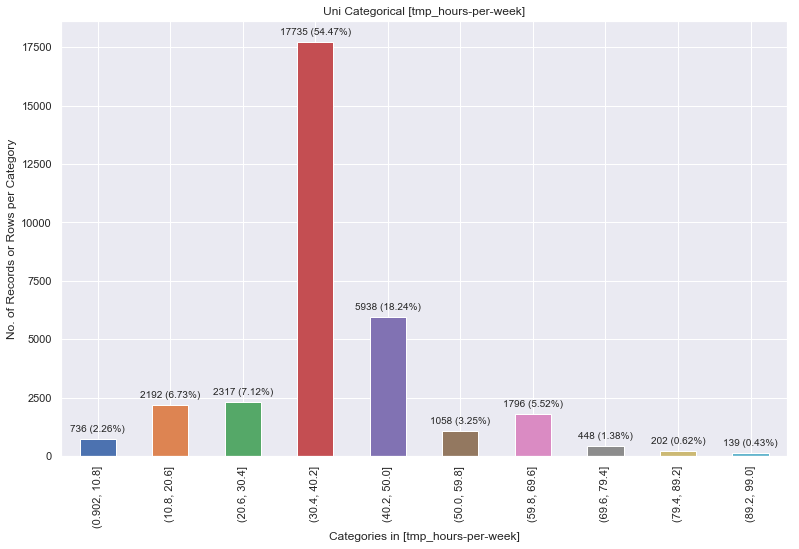

In [20]:
chartil.plot(adult_income_df, ['hours-per-week'], chart_type='barchart')

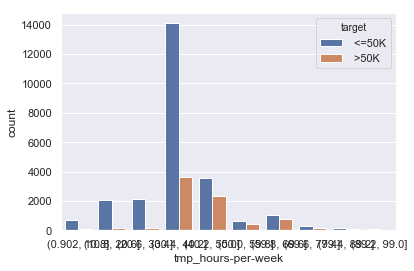

In [21]:
chartil.plot(adult_income_df, ['hours-per-week','target'], chart_type='barchart')

target               <=50K   >50K
tmp_hours-per-week               
(0.902, 10.8]        0.912  0.088
(10.8, 20.6]         0.941  0.059
(20.6, 30.4]         0.932  0.068
(30.4, 40.2]         0.795  0.205
(40.2, 50.0]         0.604  0.396
(50.0, 59.8]         0.573  0.427
(59.8, 69.6]         0.568  0.432
(69.6, 79.4]         0.652  0.348
(79.4, 89.2]         0.609  0.391
(89.2, 99.0]         0.705  0.295


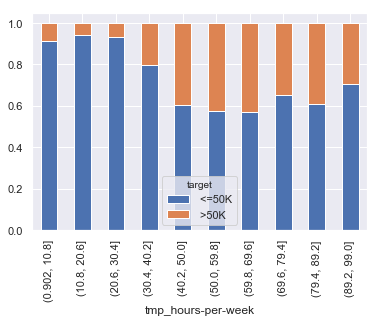

In [22]:
chartil.plot(adult_income_df, ['hours-per-week','target'], chart_type='crosstab', 
             optional_settings={'sort_by_value':False})

In [23]:
import importlib
importlib.reload(chartil)
importlib.reload(dp)

<module 'KUtils.eda.data_preparation' from 'D:\\projects\\datascience\\kesh-utils\\KUtils\\eda\\data_preparation.py'>

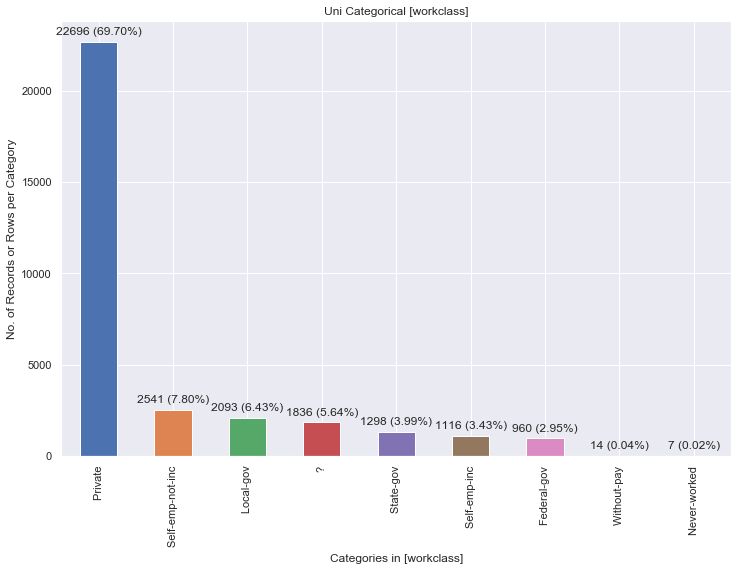

In [24]:
chartil.plot(adult_income_df, [ 'workclass'], optional_settings={'sort_by_value':True})

There are some missing values in teh fome of '?' which almost accounts for 1836 records (5.64%)
Options are
- Replace with most appearing item (Mode) 
- Treat it as separate type "Unknown" 

Lets check with target column using crosstab

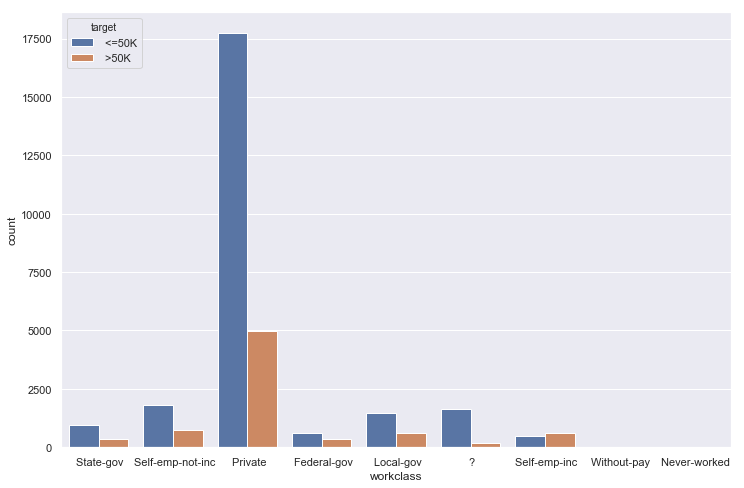

In [25]:
chartil.plot(adult_income_df, ['workclass', 'target'])

target              <=50K   >50K
workclass                       
 Never-worked       1.000  0.000
 Without-pay        1.000  0.000
 ?                  0.896  0.104
 Private            0.781  0.219
 State-gov          0.728  0.272
 Self-emp-not-inc   0.715  0.285
 Local-gov          0.705  0.295
 Federal-gov        0.614  0.386
 Self-emp-inc       0.443  0.557


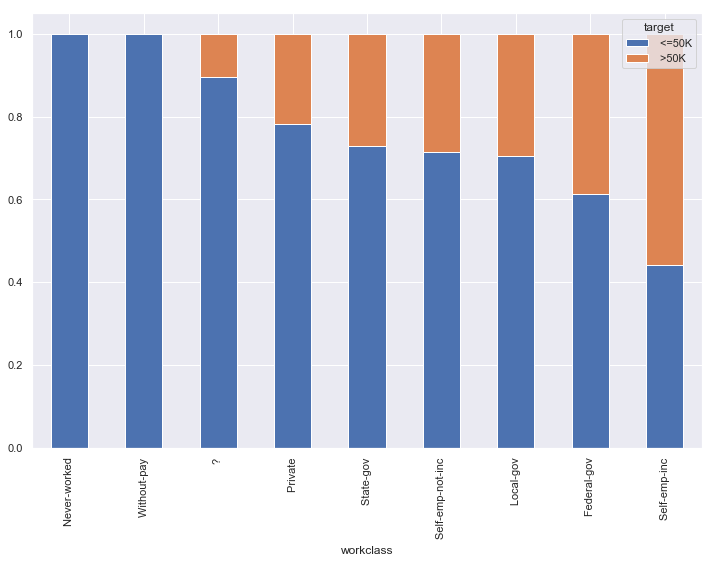

In [26]:
chartil.plot(adult_income_df, [ 'workclass', 'target'], chart_type='crosstab', optional_settings={'sort_by_value':True})

This '?' doesn't show any resemblence with any other group. So treat it as Unknown

In [27]:
adult_income_df['workclass']=adult_income_df['workclass'].replace(' ?','Unknown')

In [28]:
adult_income_df['fnlwgt'].describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

count      32,561.000
mean      189,778.367
std       105,549.978
min        12,285.000
1%         27,185.800
25%       117,827.000
50%       178,356.000
75%       237,051.000
90%       329,054.000
95%       379,682.000
99%       510,072.000
max     1,484,705.000
Name: fnlwgt, dtype: float64

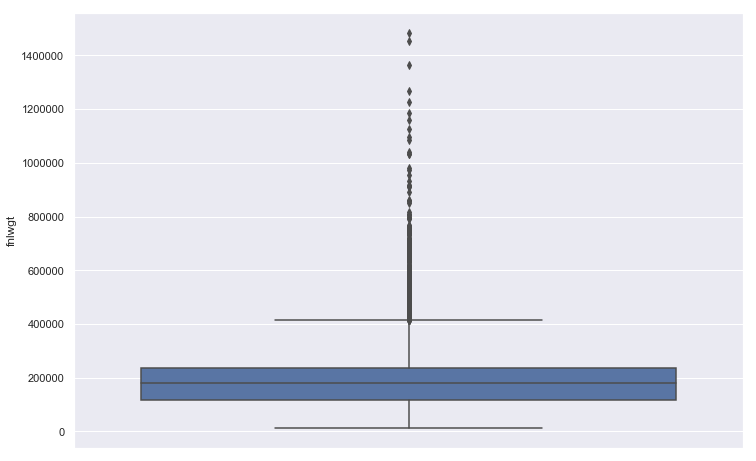

In [29]:
chartil.plot(adult_income_df,['fnlwgt'])

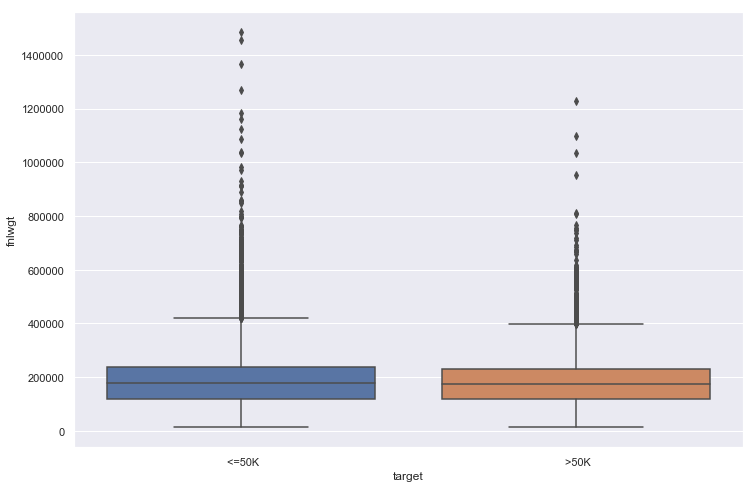

In [30]:
chartil.plot(adult_income_df,['fnlwgt', 'target'])

C:\Users\keshav\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


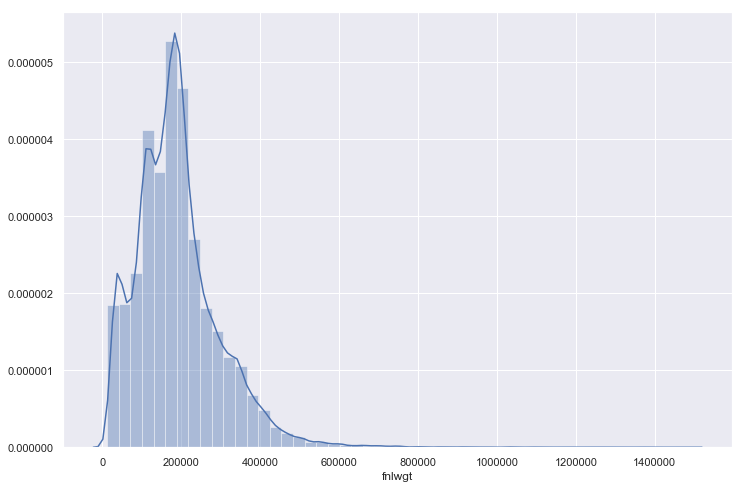

In [31]:
chartil.plot(adult_income_df,['fnlwgt'], chart_type='distplot')

Todo: Right skewed data. Use log(ln) to stabilize

In [32]:
adult_income_df['fnlwgt']=np.log(adult_income_df['fnlwgt'])

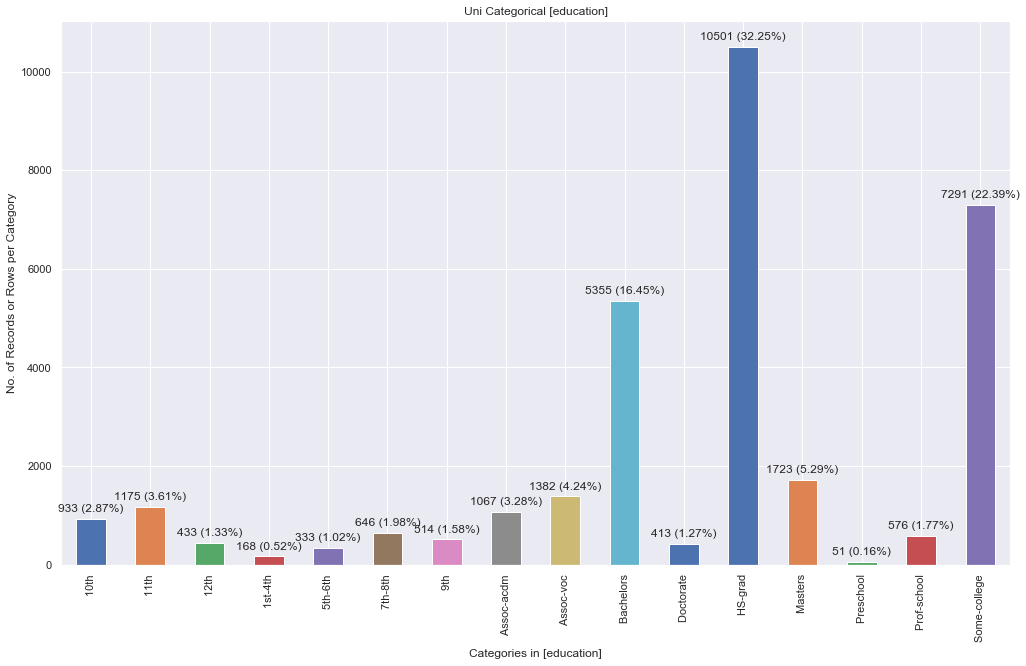

In [33]:
chartil.plot(adult_income_df,['education'])

target          <=50K   >50K
education                   
 10th           0.934  0.066
 11th           0.949  0.051
 12th           0.924  0.076
 1st-4th        0.964  0.036
 5th-6th        0.952  0.048
 7th-8th        0.938  0.062
 9th            0.947  0.053
 Assoc-acdm     0.752  0.248
 Assoc-voc      0.739  0.261
 Bachelors      0.585  0.415
 Doctorate      0.259  0.741
 HS-grad        0.840  0.160
 Masters        0.443  0.557
 Preschool      1.000  0.000
 Prof-school    0.266  0.734
 Some-college   0.810  0.190


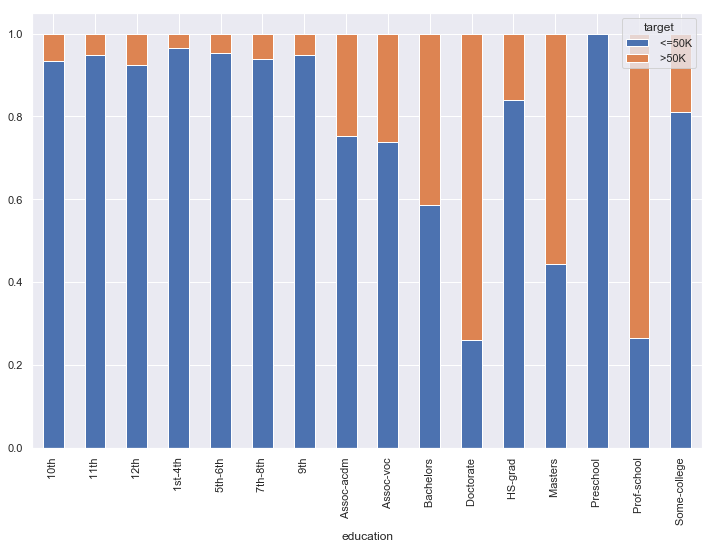

In [34]:
chartil.plot(adult_income_df,['education','target'],  chart_type='crosstab' )

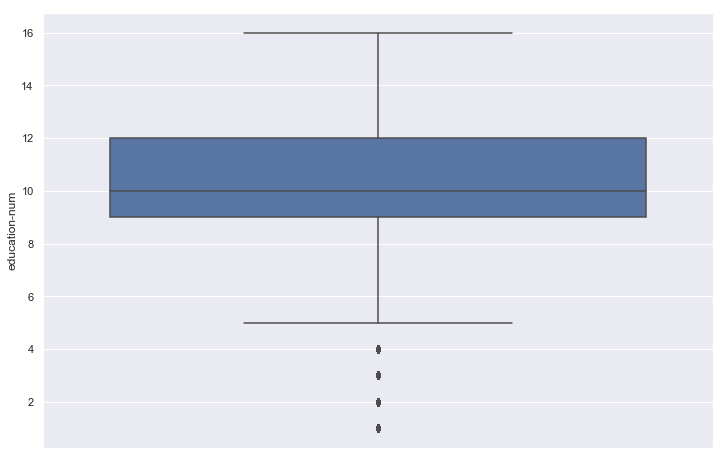

In [35]:
chartil.plot(adult_income_df,['education-num'])

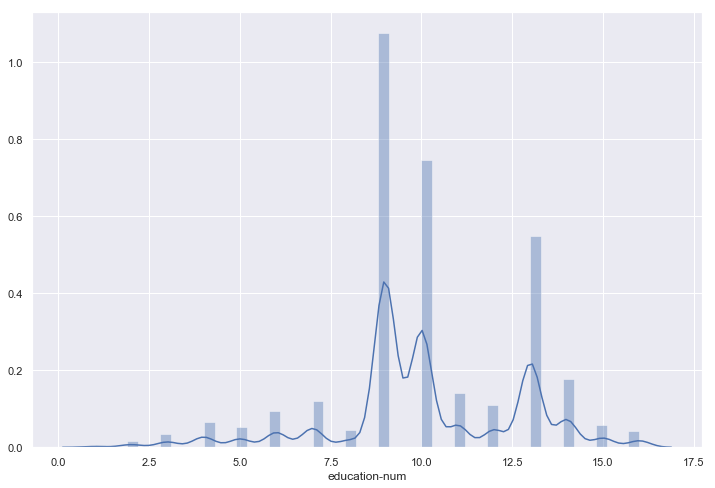

In [36]:
chartil.plot(adult_income_df,['education-num'], chart_type='distplot')

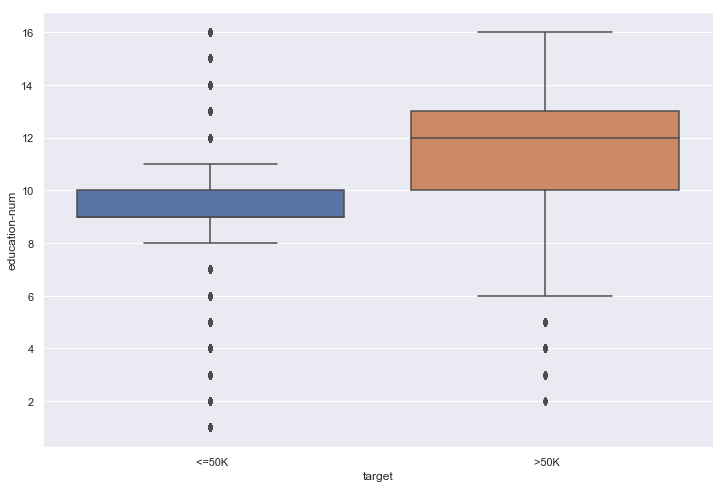

In [37]:
chartil.plot(adult_income_df,['education-num', 'target'])

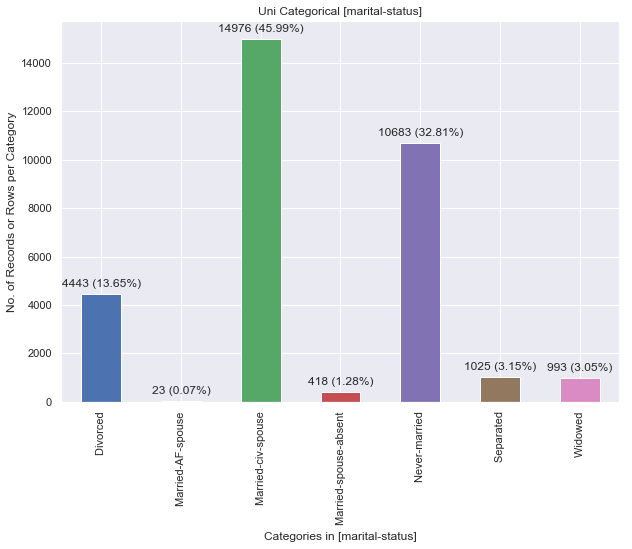

In [38]:
chartil.plot(adult_income_df,['marital-status'])

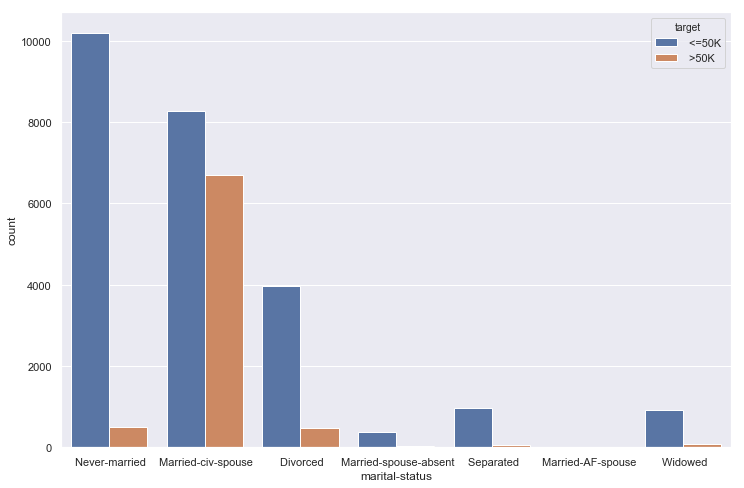

In [39]:
chartil.plot(adult_income_df,['marital-status', 'target'])

target                   <=50K   >50K
marital-status                       
 Divorced                0.896  0.104
 Married-AF-spouse       0.565  0.435
 Married-civ-spouse      0.553  0.447
 Married-spouse-absent   0.919  0.081
 Never-married           0.954  0.046
 Separated               0.936  0.064
 Widowed                 0.914  0.086


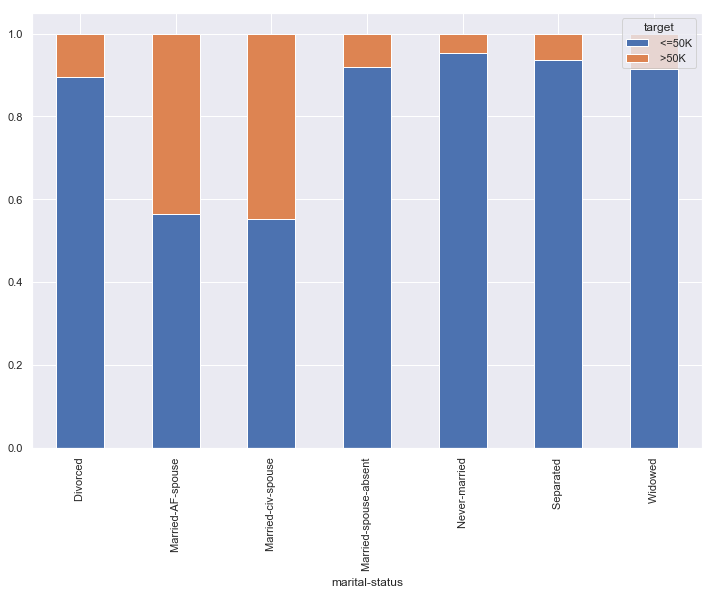

In [40]:
chartil.plot(adult_income_df,['marital-status', 'target'],chart_type='crosstab' )

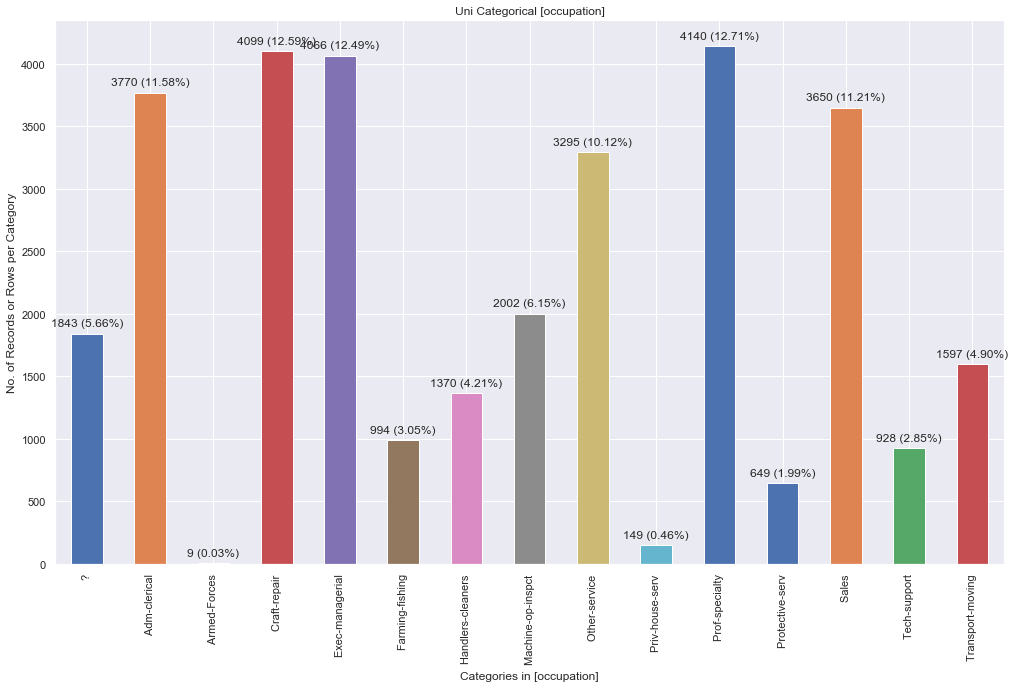

In [41]:
chartil.plot(adult_income_df,['occupation'])

There are some missing values in teh fome of '?' which almost accounts for 1843 records (5.66%)
Options are
- Replace with most appearing item (Mode) 
- Treat it as separate type "Unknown" 

Lets check with target column using crosstab

target               <=50K   >50K
occupation                       
 ?                   0.896  0.104
 Adm-clerical        0.866  0.134
 Armed-Forces        0.889  0.111
 Craft-repair        0.773  0.227
 Exec-managerial     0.516  0.484
 Farming-fishing     0.884  0.116
 Handlers-cleaners   0.937  0.063
 Machine-op-inspct   0.875  0.125
 Other-service       0.958  0.042
 Priv-house-serv     0.993  0.007
 Prof-specialty      0.551  0.449
 Protective-serv     0.675  0.325
 Sales               0.731  0.269
 Tech-support        0.695  0.305
 Transport-moving    0.800  0.200


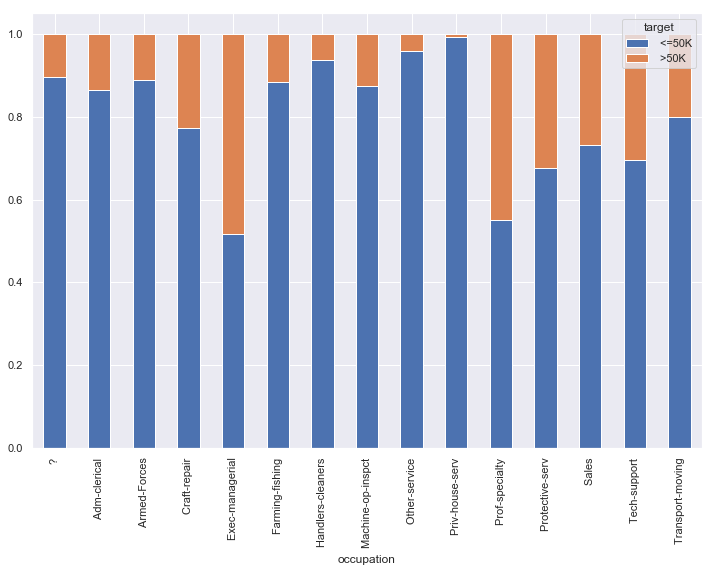

In [42]:
chartil.plot(adult_income_df,['occupation','target'],chart_type='crosstab' )

This '?' doesn't show any resemblence with any other group. Also note that earlier workclass had same sample. Both comes from same set. Dropping is better solution. Treating it s unknown may introduce perfect corelated features at later stage and fails to converge.

In [43]:
adult_income_df = adult_income_df[adult_income_df['occupation'] != ' ?']

In [44]:
#adult_income_df['workclass']=
#adult_income_df['occupation']=adult_income_df['occupation'].replace(' ?','Unknown')

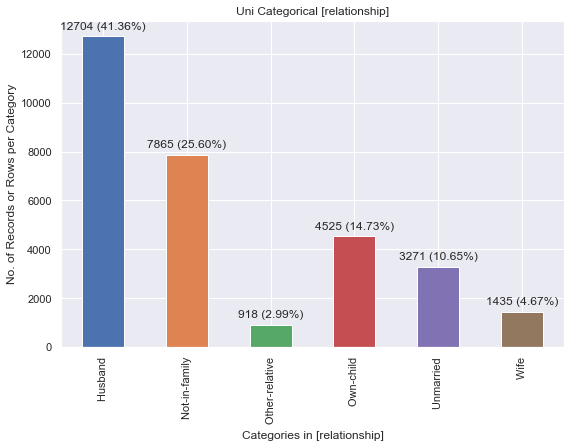

In [45]:
chartil.plot(adult_income_df,['relationship'])

target            <=50K   >50K
relationship                  
 Husband          0.544  0.456
 Not-in-family    0.893  0.107
 Other-relative   0.961  0.039
 Own-child        0.985  0.015
 Unmarried        0.934  0.066
 Wife             0.509  0.491


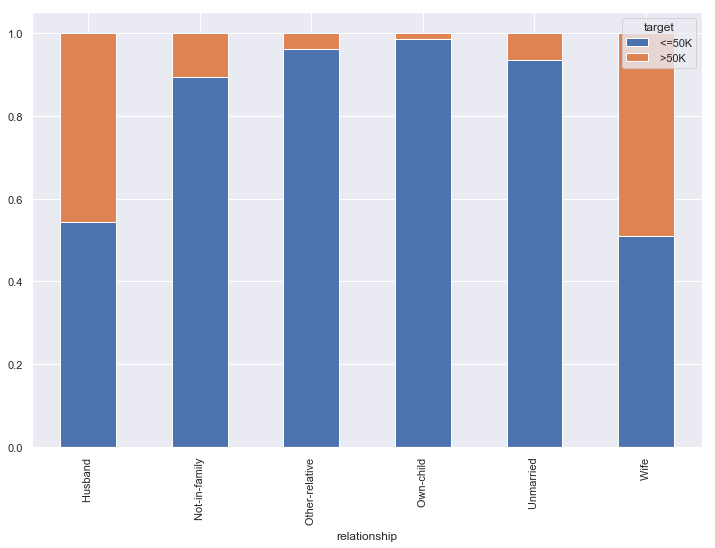

In [46]:
chartil.plot(adult_income_df,['relationship', 'target'], chart_type='crosstab')

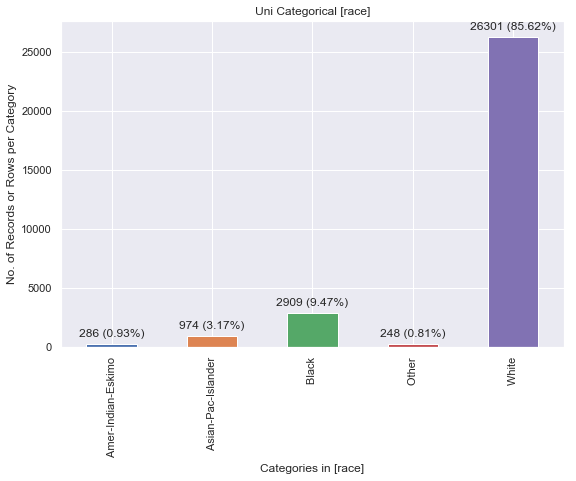

In [47]:
chartil.plot(adult_income_df,['race'])

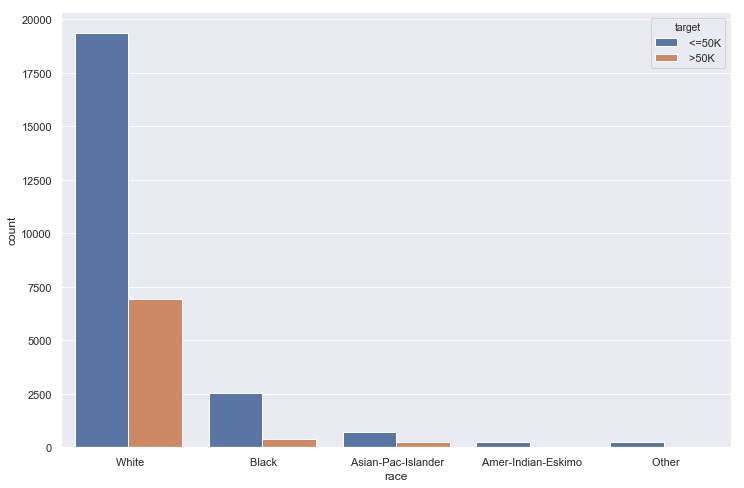

In [48]:
chartil.plot(adult_income_df,['race', 'target'])

target                <=50K   >50K
race                              
 Amer-Indian-Eskimo   0.881  0.119
 Asian-Pac-Islander   0.722  0.278
 Black                0.870  0.130
 Other                0.907  0.093
 White                0.736  0.264


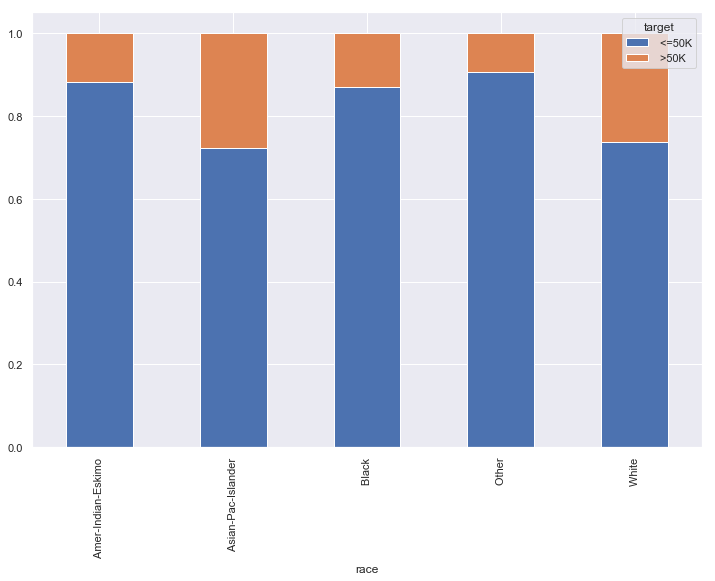

In [49]:
chartil.plot(adult_income_df,['race', 'target'], chart_type='crosstab')

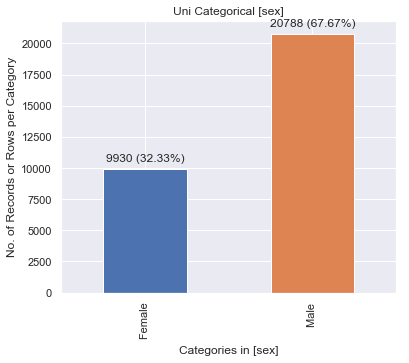

In [50]:
chartil.plot(adult_income_df,['sex'])

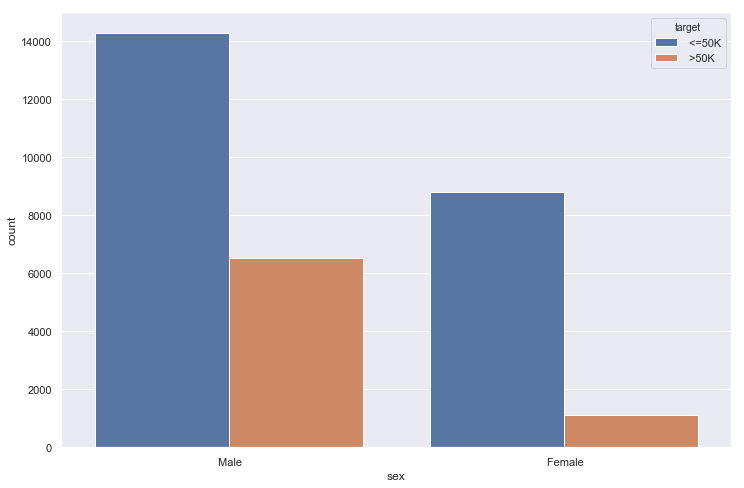

In [51]:
chartil.plot(adult_income_df,['sex','target'])

target    <=50K   >50K
sex                   
 Female   0.887  0.113
 Male     0.686  0.314


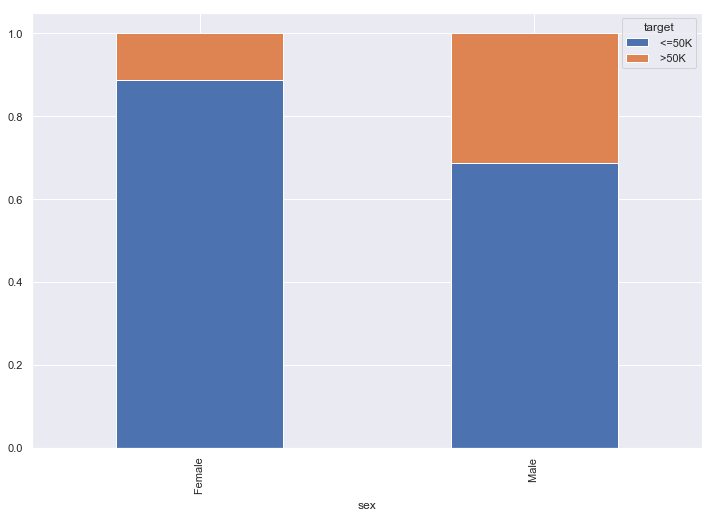

In [52]:
chartil.plot(adult_income_df,['sex','target'], chart_type='crosstab')

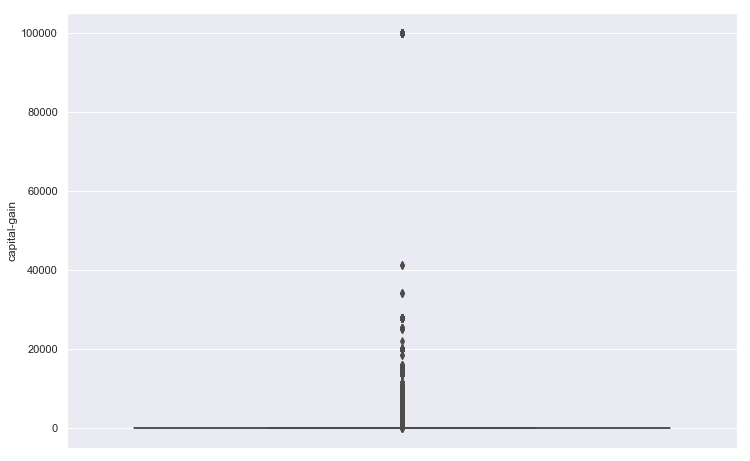

In [53]:
chartil.plot(adult_income_df,['capital-gain'])

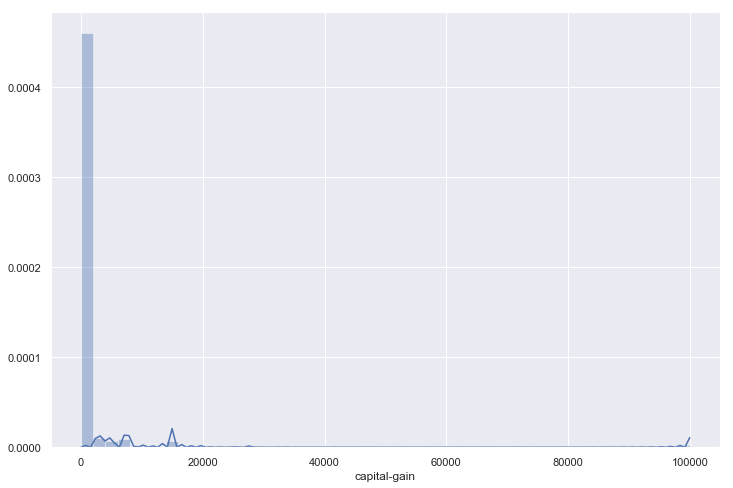

In [54]:
chartil.plot(adult_income_df,['capital-gain'], chart_type='distplot')

In [55]:
# Need outlier treatment

In [56]:
adult_income_df['capital-gain'].describe()

count   30,718.000
mean     1,106.037
std      7,497.863
min          0.000
25%          0.000
50%          0.000
75%          0.000
max     99,999.000
Name: capital-gain, dtype: float64

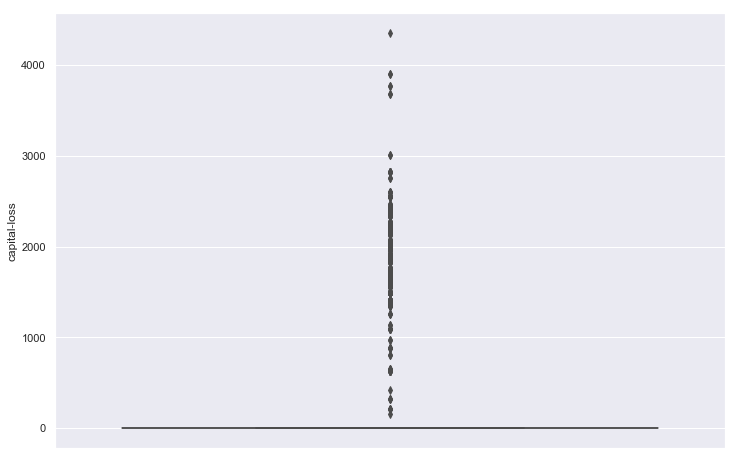

In [57]:
chartil.plot(adult_income_df,['capital-loss'])

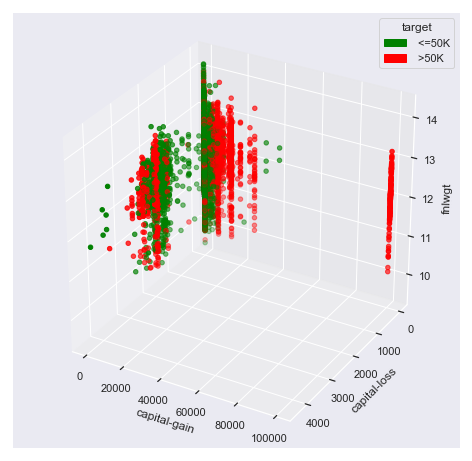

In [58]:
chartil.plot(adult_income_df,['capital-gain', 'capital-loss', 'fnlwgt', 'target'])

In [59]:
adult_income_df['capital-loss'].describe()

count   30,718.000
mean        88.910
std        405.657
min          0.000
25%          0.000
50%          0.000
75%          0.000
max      4,356.000
Name: capital-loss, dtype: float64

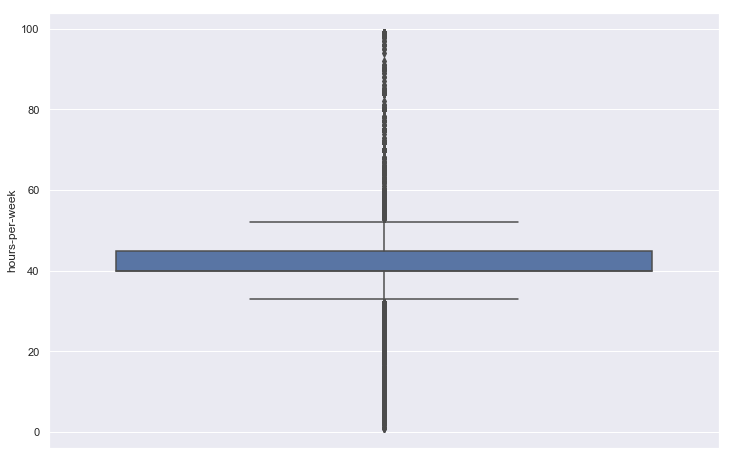

In [60]:
chartil.plot(adult_income_df,['hours-per-week'])

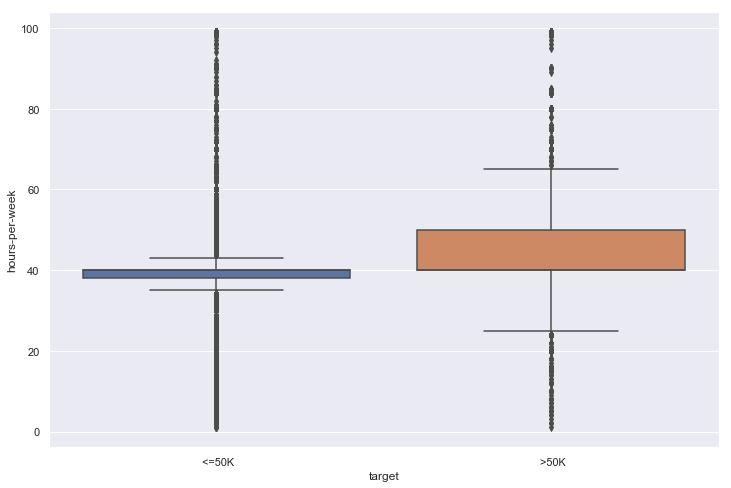

In [61]:
chartil.plot(adult_income_df,['hours-per-week','target'])

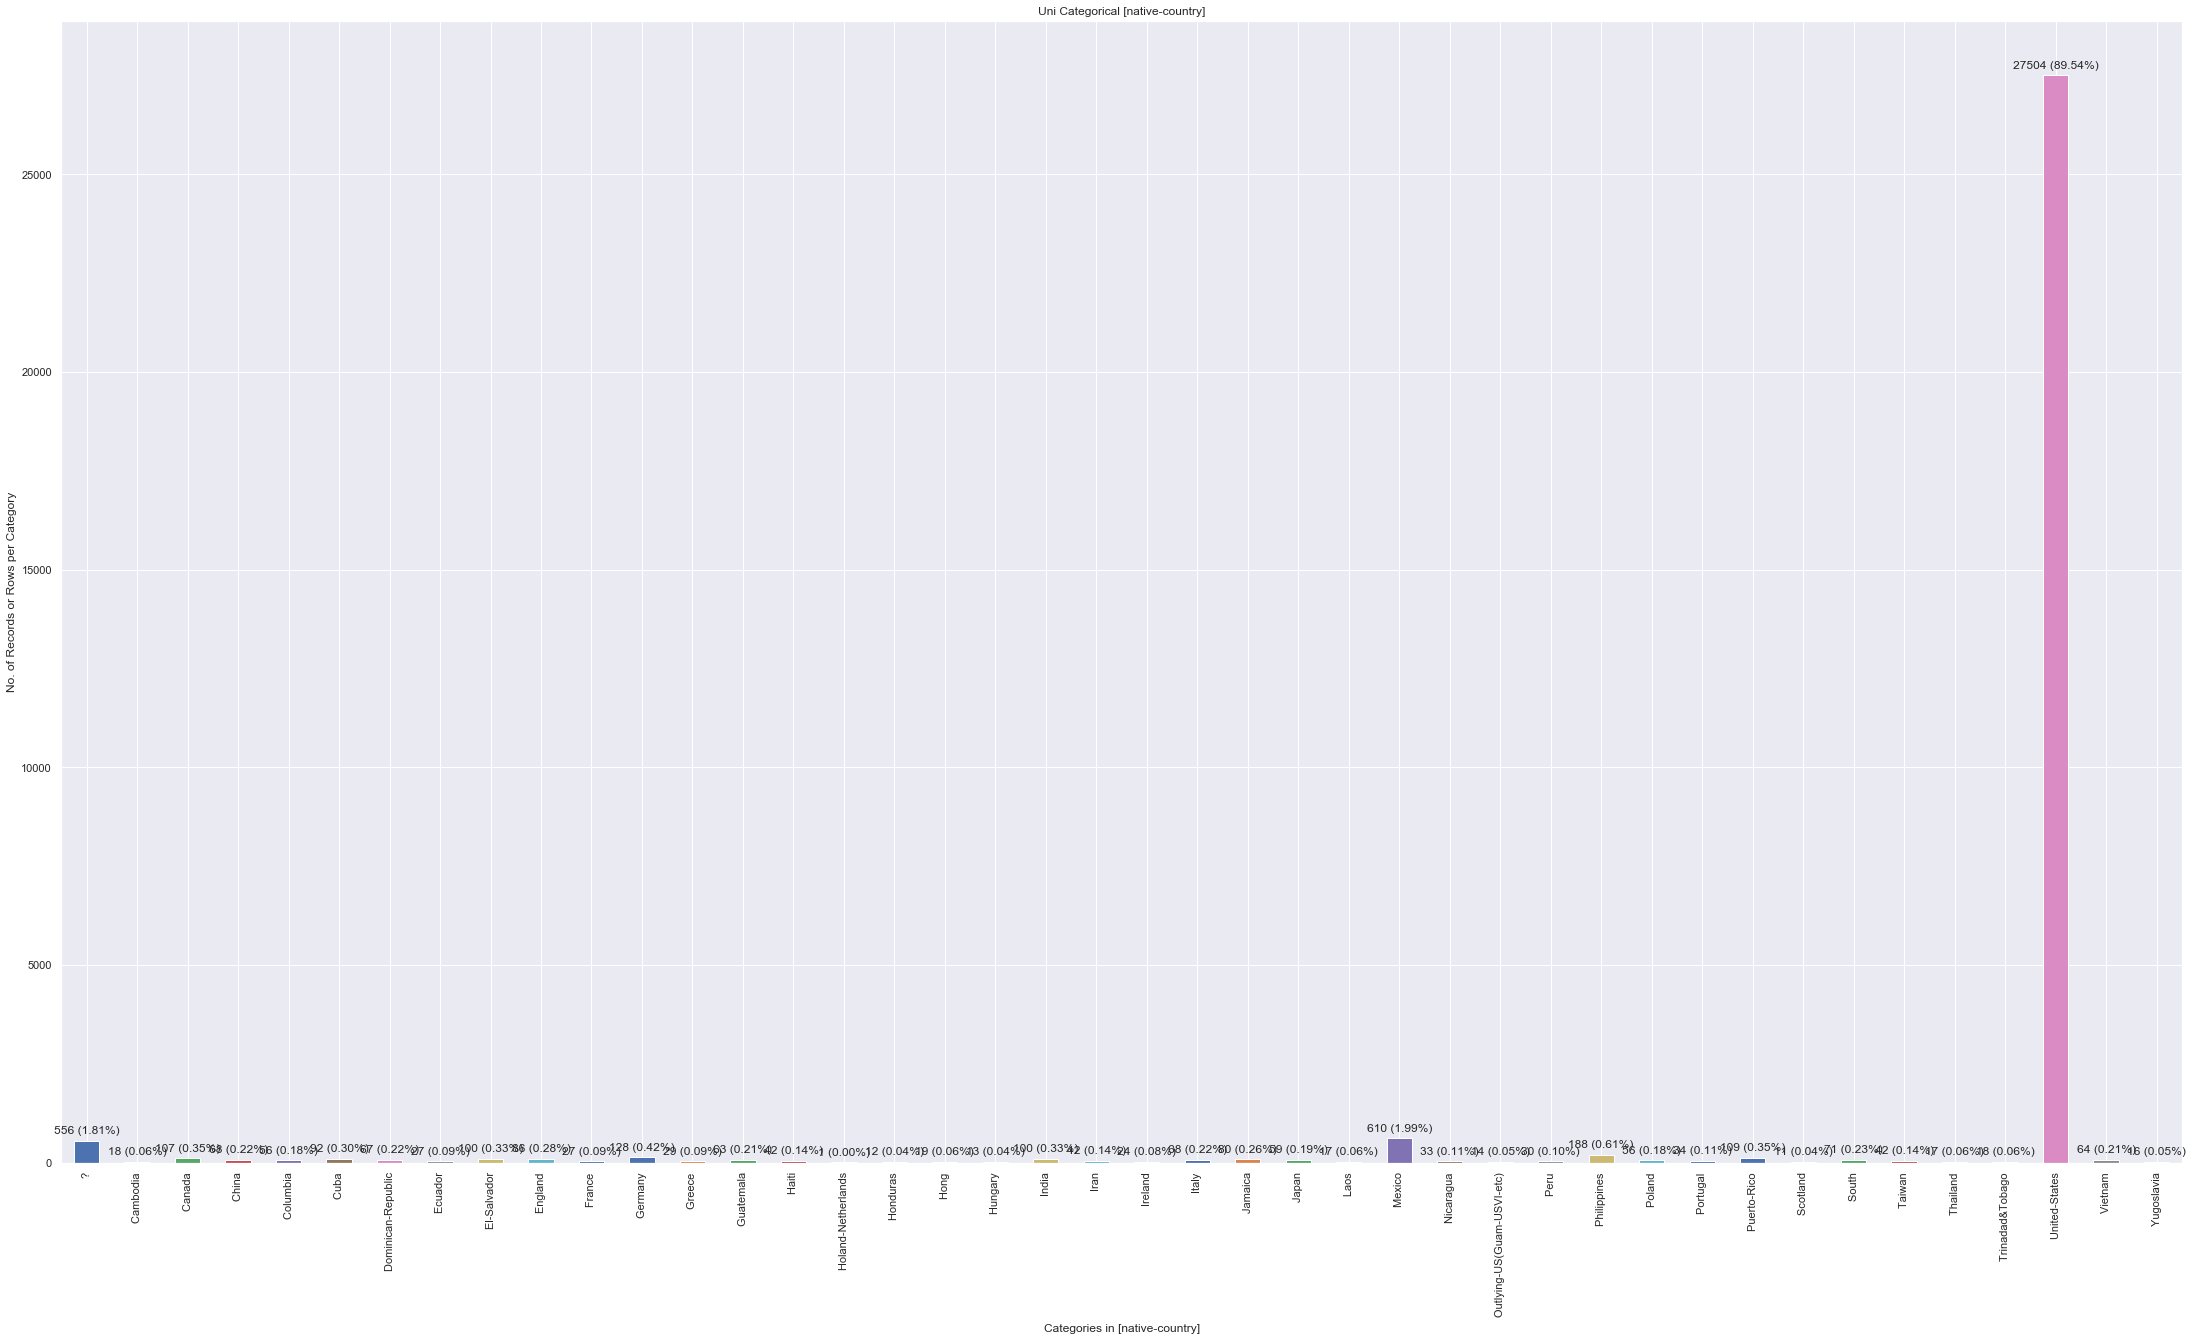

In [62]:
chartil.plot(adult_income_df,['native-country'])

Contains ' ?'. 
Replace with mode

In [63]:
adult_income_df['native-country']=adult_income_df['native-country'].replace(' ?',
                                                                            adult_income_df['native-country'].mode()[0])


Better to make a boolean feataure like US and Non-US

In [64]:
adult_income_df.loc[adult_income_df['native-country']!=' United-States','native-country'] = 'non_usa'

In [65]:
adult_income_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,11.258,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,11.330,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,12.281,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,12.366,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,12.732,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,non_usa,<=50K


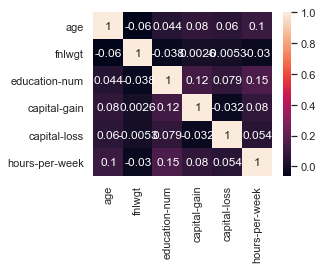

In [68]:
# Heatmap for futire
chartil.plot(adult_income_df, adult_income_df.columns)

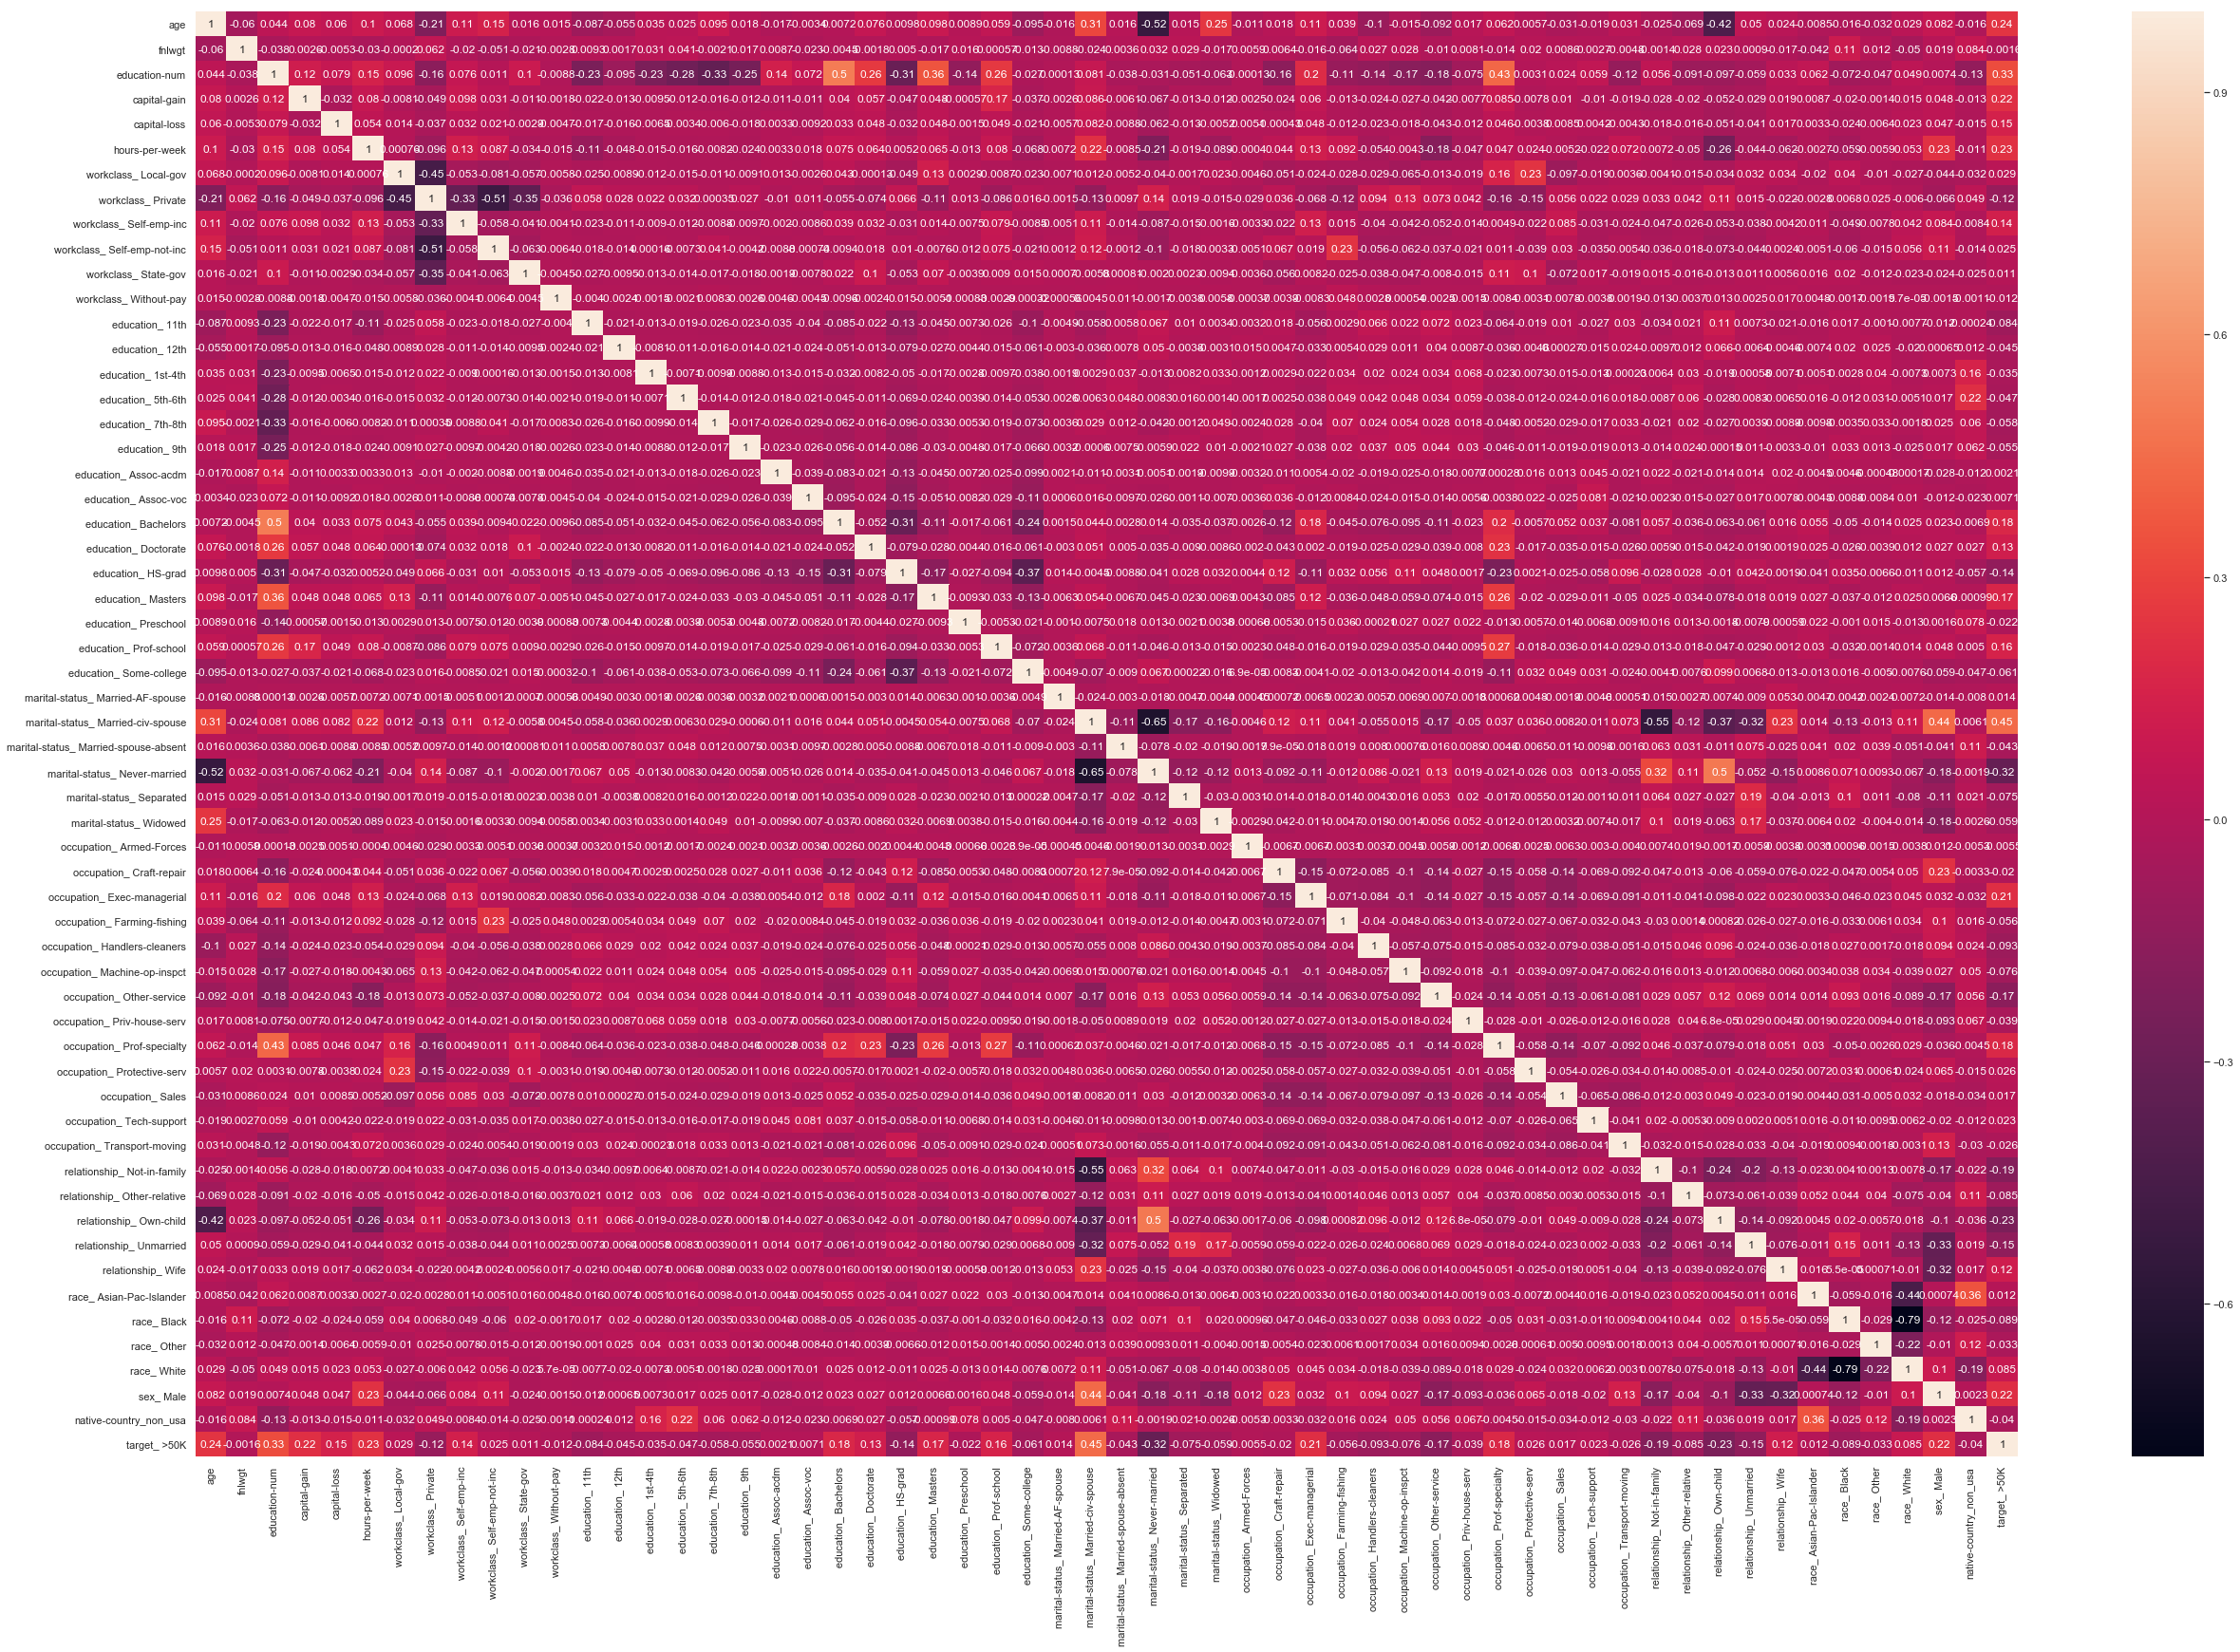

In [69]:
chartil.plot(adult_income_df, adult_income_df.columns, optional_settings={'include_categorical':True})

In [67]:
# Save the cleaned data for further datapreparation/transformation and modelling building in subsequent steps
adult_income_df.to_csv("cleaned.csv", index=False)

# Run Kalgo (What best metrics we can achieve with deep search and near miss overfit)

### <font color='red'>** Use this only for small dataset and critically unbalanced positive class</font>
#### This library only for experimental purpose

In [34]:
# Use this only for small dataset and critically unbalanced positive class
from KUtils.kalgo import aubo
import importlib
importlib.reload(aubo)

<module 'KUtils.kalgo.aubo' from 'D:\\projects\\datascience\\kesh-utils\\KUtils\\kalgo\\aubo.py'>

In [35]:
df = pd.read_csv('cleaned.csv')
df['target'] = df['target'].map({' >50K':1, ' <=50K':0})
df['target'] = df['target'].astype('category')

In [36]:
result = aubo.run_for_eternity(df, target_column_name='target', verbose=True)

  Fixing column names bcoz df.query not comfortable with special chars in feature names
education-num Replaced with education_num
marital-status Replaced with marital_status
capital-gain Replaced with capital_gain
capital-loss Replaced with capital_loss
hours-per-week Replaced with hours_per_week
native-country Replaced with native_country
  Converting all continuous variables to cut categorical bins after MinMaxScaling
 Has to go thru rows 7650
 Now wait...


C:\Users\keshav\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


 Remaining rows to process 6819
 Remaining rows to process 6026
 Remaining rows to process 5325
 Remaining rows to process 4677
 Remaining rows to process 4064
 Remaining rows to process 3462
 Remaining rows to process 2884
 Remaining rows to process 2335
 Remaining rows to process 1793
 Remaining rows to process 1266
 Remaining rows to process 749
 Remaining rows to process 240
Done.
For this dataset max performance you can achieve is 
  Accuracy around 0.866
  Sensitivity around 0.569
  Specificity around 0.965
  Precision around 0.875
  Recall around 0.569


In [32]:
result.head(15)

,query_id,query,positive_record_Count,negative_record_Count,total_records,tp,tn,fp,fn
0,0,workclass==' Self-emp-not-inc' and education==...,1,0,1,0.5,0,0,0.5
1,1,workclass==' Private' and education==' Masters...,1,0,1,0.5,0,0,0.5
2,2,workclass==' Private' and education==' Bachelo...,15,4,19,15.0,0,4,0.0
3,3,workclass==' Private' and education==' Some-co...,1,0,1,0.5,0,0,0.5
4,4,workclass==' State-gov' and education==' Bache...,1,0,1,0.5,0,0,0.5
5,5,workclass==' Private' and education==' Assoc-v...,1,0,1,0.5,0,0,0.5
6,6,workclass==' Self-emp-not-inc' and education==...,1,0,1,0.5,0,0,0.5
7,7,workclass==' Private' and education==' Doctora...,3,0,3,3.0,0,0,0.0
8,8,workclass==' Local-gov' and education==' Bache...,1,0,1,0.5,0,0,0.5
9,9,workclass==' Private' and education==' Some-co...,1,0,1,0.5,0,0,0.5
